<a href="https://colab.research.google.com/github/hiya2002/Srishti-23/blob/main/Hiya_Bhatt_Tutorial_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)

In [ ]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1,0,0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

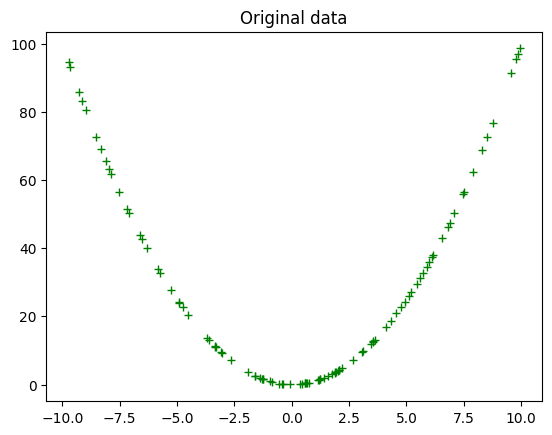

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [ ]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.7)
    xs.append(x)
    ys.append(y)


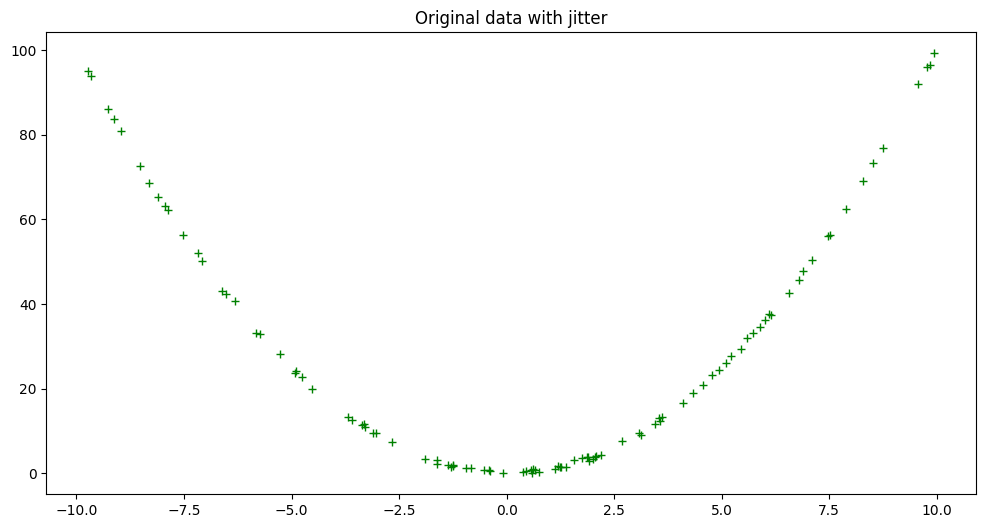

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

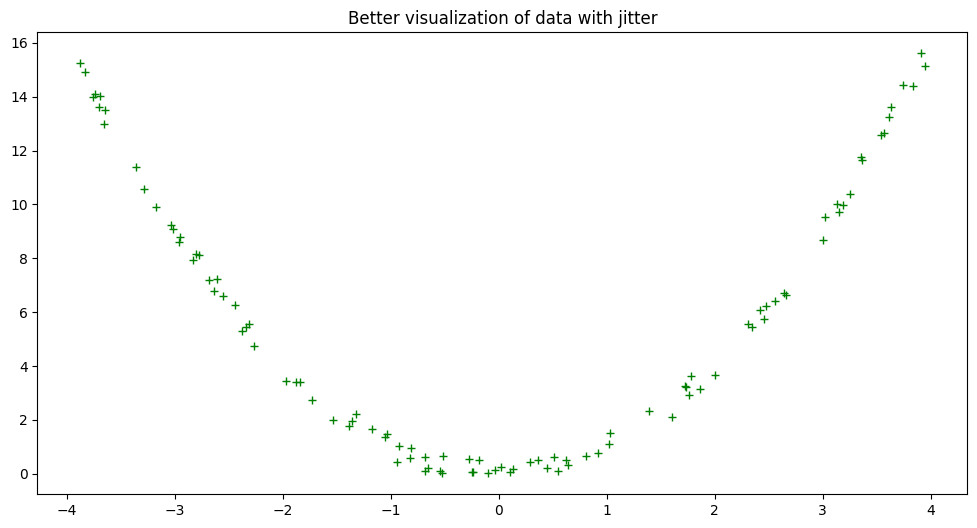

In [ ]:
# To visulaize the jitter noise added in the data
# We try to simulate another set of x and y values

hundred_xt = np.random.uniform(-4, 4, 100)
xt = []
yt = []

for x in hundred_xt:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.5)
    xt.append(x)
    yt.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xt, yt, 'g+')
plt.title('Better visualization of data with jitter')
plt.show()

In [ ]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

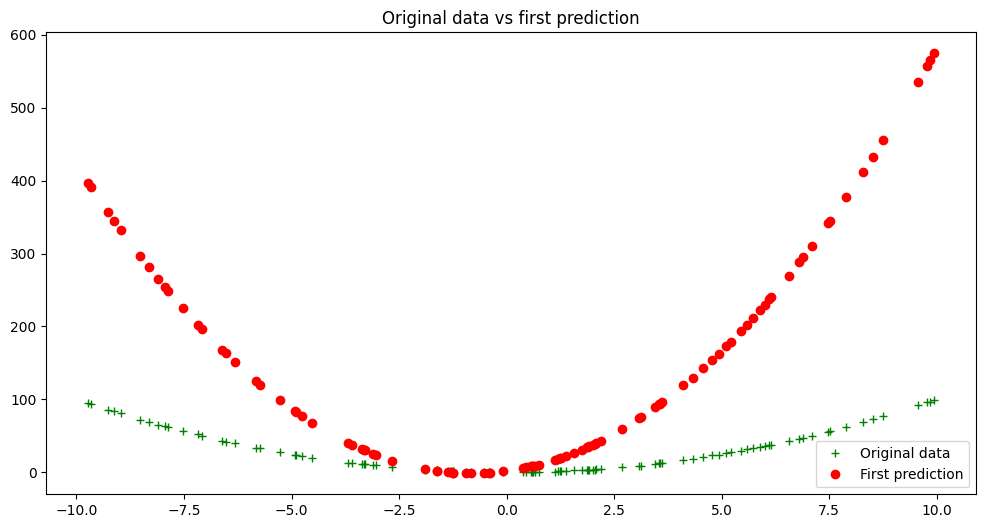

In [ ]:
# First step, randomly predicting the coefficients
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'Original data')
plt.plot(xs, y_bar, 'ro', label = 'First prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

28988.252845779192

In [ ]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    # num = [i for i in y_bars]
    n = len(y_bars)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [ ]:
# Second step, finding the gradient of the problem
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001 # learning rate

# Continuing the second step
# Changing the coeffients in the negative direction of the gradient
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new) # New coeffients
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (3.6622972442578843, 7.949664491110112, 1.9764779152757688)
Now have smaller model loss: 14011.298345558522 vs 28988.252845779192


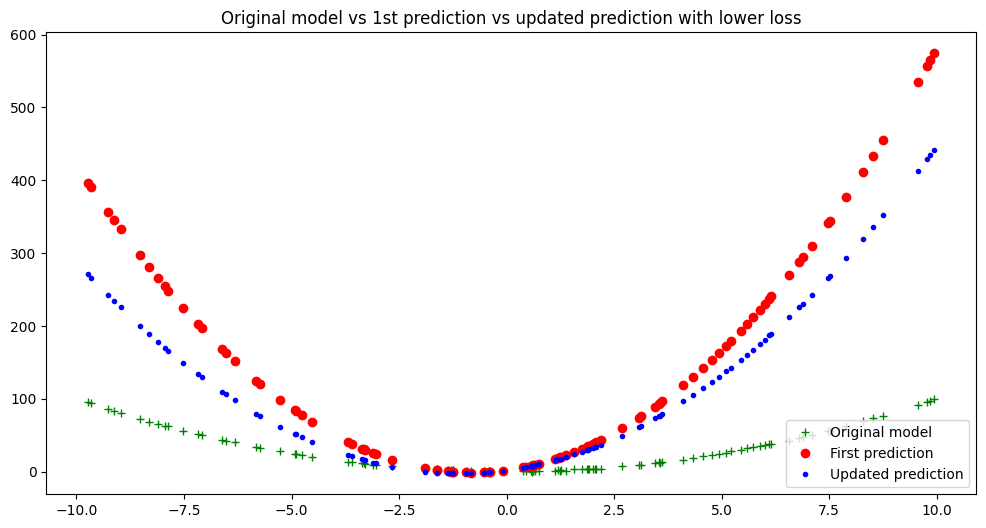

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'Original model')
plt.plot(xs, y_bar, 'ro', label = 'First prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'Updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs

    # Third step, Here we are fixing the number of times, we are running the problem
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)

    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

[1747.7992224950046, 1685.4373903094806, 1628.953287065741, 1574.3646916250084, 1521.6074656712094, 1470.6201681519772, 1421.3434193921723, 1373.719831857708, 1327.6939433207726, 1283.2121522673435, 1240.2226554717063, 1198.6753876653047, 1158.5219632296619, 1119.7156198454477, 1082.2111640320777, 1045.9649185144171, 1010.9346713552912, 977.0796267945558, 944.3603577374793, 912.7387598371067, 882.1780071171139, 852.6425090834921, 824.0978692750894, 796.5108452047601, 769.8493096444456, 744.0822132091208, 719.1795481960122, 695.1123136369821, 671.8524815233815, 649.3729641640308, 627.6475826383119, 606.6510363076363, 586.3588733497803, 566.7474622817666, 547.7939644381343, 529.4763073725393, 511.7731591517085, 494.6639035118149, 478.1286158483342, 462.1480400114213, 446.7035658797902, 431.7772076869613, 417.3515830746591, 403.4098928489405, 389.93590141549436, 376.91391787132176, 364.32877773077337, 352.1658252646641, 340.4108964318973, 329.05030238371904, 318.0708135213915, 307.4596440

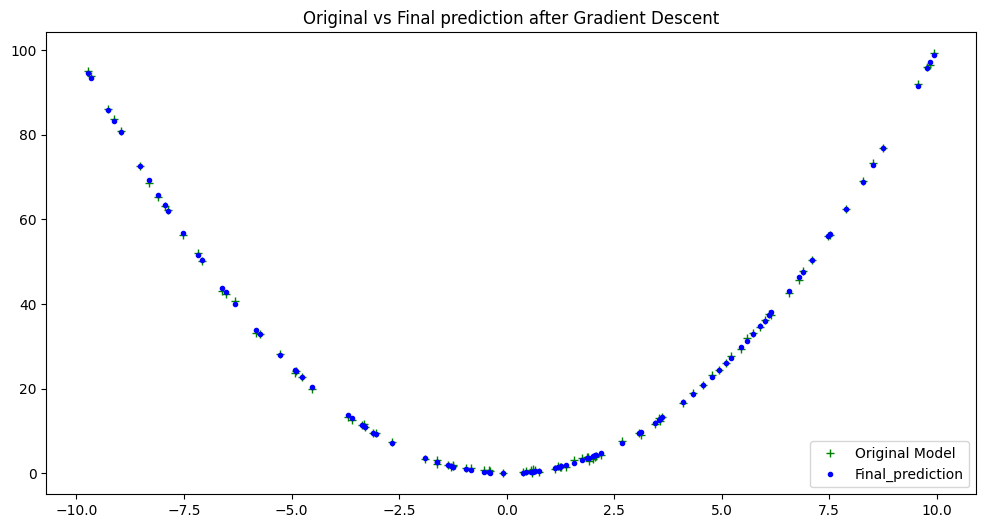

In [ ]:
GD = gradient_descent(30000, 0.0003)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'Original Model')
plt.plot(xs, GD[2], 'b.', label = 'Final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")
print()
print(f"Initial Loss Calculated: {initial_model_loss}")
print(f"Loss calculated after last epoch: {GD[3][-1]}")

Final Coefficients predicted: (1.0013605216747217, 0.004997216464035047, 0.03606182812633702)
Original Coefficients: [1, 0, 0]

Initial Loss Calculated: 28988.252845779192
Loss calculated after last epoch: 0.15516605893185112


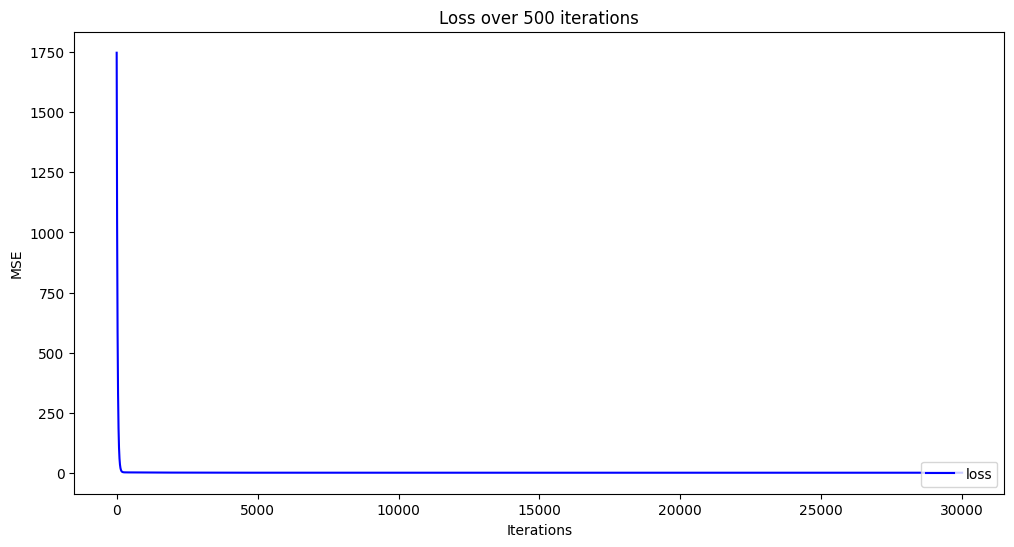

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

In [ ]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [3,-1,2,-3,0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

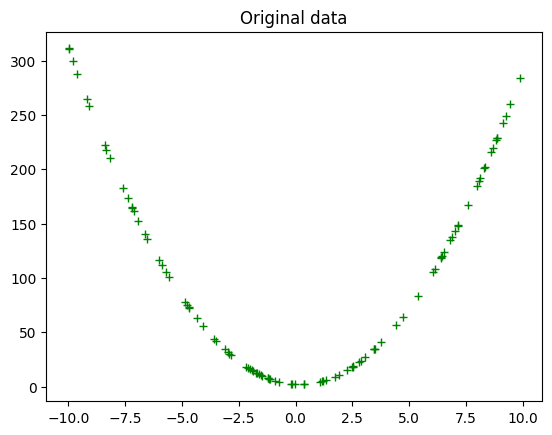

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

In [ ]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


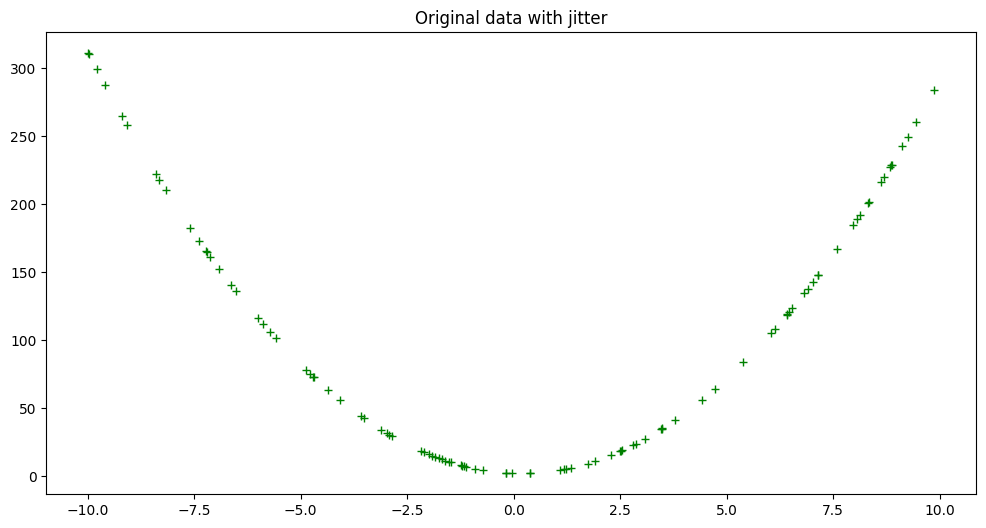

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

#Question 1

* By changing the values of the coefficients, you can alter the shape and behavior of the polynomial curve. For example, if you change the coefficients to [2, -3, 1], it represents a polynomial of the form 2x^2 - 3x + 1. Modifying the coefficients will result in a different polynomial equation and, consequently, a different curve when plotted.


* The j parameter is used in the eval_polynomial_jitter function to introduce noise to the output values (y). By adjusting the value of j, you control the amount of noise added to the polynomial's output. Increasing j will result in a larger range of jittered values around the actual polynomial curve, making the data points more scattered.



* The learning rate (lr) is a hyperparameter that controls the step size taken during each iteration of the gradient descent algorithm. It determines how quickly the model learns and converges to an optimal solution. If you increase the learning rate, the model will update its coefficients more drastically in each iteration, potentially leading to faster convergence but also the risk of overshooting the optimal solution. Conversely, decreasing the learning rate may result in slower convergence but potentially more precise parameter updates.


* The epochs parameter represents the number of iterations performed during the gradient descent process. Increasing the number of epochs allows the model to undergo more iterations and potentially refine its predictions further. However, there is a trade-off as a larger number of epochs can lead to longer computation times. Adjusting the number of epochs can impact the convergence and overall accuracy of the model's predictions.


# Question 2

Changing the polynomial degree can have an effect on the convergence of gradient descent.
Number of Parameters: The degree of the polynomial determines the number of parameters or coefficients to be learned. Higher-degree polynomials have more parameters, which increases the dimensionality of the optimization problem. In general, as the number of parameters increases, the optimization becomes more complex, and convergence can become slower.

Curvature of the Loss Surface: The curvature of the loss surface depends on the degree of the polynomial. Higher-degree polynomials can introduce more complex and non-linear loss surfaces with multiple local minima, making it harder for gradient descent to find the global minimum. Convergence can be slower in such cases, as the algorithm can get stuck in local minima.

Conditioning of the Problem: The conditioning of the optimization problem can also be affected by the polynomial degree. Conditioning refers to the sensitivity of the problem to changes in the input or parameters. Higher-degree polynomials may result in ill-conditioned problems, where small changes in the parameters can lead to large changes in the output. Ill-conditioned problems can make convergence slower and more challenging.

Learning Rate and Step Size: The choice of learning rate or step size in gradient descent is crucial for convergence. Higher-degree polynomials may require more careful tuning of the learning rate to ensure stable convergence. If the learning rate is too large, it can lead to divergence or oscillations. If it is too small, convergence can be very slow.

Initialization: The choice of initial parameter values can also impact convergence. Higher-degree polynomials may have a larger parameter space, and initializing the parameters in a suitable range can help with convergence. Improper initialization can cause the algorithm to get stuck in local minima or take longer to converge.

# Question 3

By observing the convergence behavior, you can see how different learning rates affect the number of iterations required to converge and whether the algorithm converges at all. A very large learning rate might lead to divergence, where the loss increases instead of decreasing.  On the other hand, a very small learning rate might result in very slow convergence.

By adjusting the learning rate, you can find a balance between convergence speed and stability. It's essential to choose an appropriate learning rate that allows the algorithm to converge efficiently without causing divergence.

In [ ]:
# Question 4

import numpy as np
import matplotlib.pyplot as plt

def eval_polynomial(coeffs, x):
    """
    Function to evaluate a polynomial given a specific x value.

    Args:
        coeffs: List containing the coefficients of the polynomial in descending order.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the polynomial.
    """
    y = sum(coeff * (x ** i) for i, coeff in enumerate(coeffs))
    return y

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: Training data labels.
        y_bar: Predicted labels.

    Returns:
        Calculated MSE loss.
    """
    return sum((ys - y_bar) ** 2) / len(ys)

def calc_gradient_polynomial(coeffs, inputs_x, outputs_y):
    """
    Calculates the gradient for a polynomial.

    Args:
        coeffs: Coefficients of the polynomial.
        inputs_x: Input x datapoints.
        outputs_y: Actual y output points.

    Returns:
        Calculated gradients for the polynomial as a list of coefficients.
    """
    gradients = [0] * len(coeffs)
    y_bars = [eval_polynomial(coeffs, x) for x in inputs_x]

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        for i in range(len(coeffs)):
            partial = (y_bar - y) * (x ** i)
            gradients[i] += partial

    n = len(y_bars)
    gradients = [-2 / n * grad for grad in gradients]

    return gradients

def gradient_descent(epochs, lr, initial_coeffs):
    """
    Perform gradient descent for a polynomial.

    Args:
        epochs: Number of iterations to perform of finding new coefficients and updating loss.
        lr: Specified learning rate.
        initial_coeffs: Initial coefficients for the polynomial.

    Returns:
        coeffs: Final coefficients after gradient descent.
        losses: List of loss after each epoch.
    """
    losses = []
    coeffs = initial_coeffs.copy()

    for epoch in range(epochs):
        gradient = calc_gradient_polynomial(coeffs, xs, ys)
        coeffs = [coeff - lr * grad for coeff, grad in zip(coeffs, gradient)]

        y_bars = [eval_polynomial(coeffs, x) for x in xs]
        loss = loss_mse(ys, y_bars)
        losses.append(loss)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss}")

    return coeffs



# Set the degree of the polynomial
degree = 5

# Generate some random data
np.random.seed(0)
num_points = 100
xs = np.linspace(-10, 10, num_points)
ys = np.zeros_like(xs)

# Generate a degree 5 polynomial with 5 distinct roots
coeffs_true = np.array([1, -10, 35, -50, 24, 0])
for i in range(len(xs)):
    ys[i] = eval_polynomial(coeffs_true, xs[i])

# Set the learning rate and initial coefficients
learning_rate = 0.01
initial_coeffs = np.random.randn(degree + 1)

# Perform gradient descent
num_epochs = 1000
final_coeffs = gradient_descent(num_epochs, learning_rate, initial_coeffs)

print("\nTrue Coefficients:", coeffs_true)
print("Final Coefficients:", final_coeffs)



Epoch 1/1000 - Loss: 4.9726775367676126e+22
Epoch 2/1000 - Loss: 1.988786885572371e+37
Epoch 3/1000 - Loss: 8.01107589522031e+51
Epoch 4/1000 - Loss: 3.2269623065691114e+66
Epoch 5/1000 - Loss: 1.2998610755607934e+81
Epoch 6/1000 - Loss: 5.236004189818113e+95
Epoch 7/1000 - Loss: 2.109128459282849e+110
Epoch 8/1000 - Loss: 8.495835176005407e+124
Epoch 9/1000 - Loss: 3.422229453126502e+139
Epoch 10/1000 - Loss: 1.3785171424845282e+154
Epoch 11/1000 - Loss: 5.552840737746597e+168
Epoch 12/1000 - Loss: 2.236754212806188e+183
Epoch 13/1000 - Loss: 9.009927791547886e+197
Epoch 14/1000 - Loss: 3.629312436034782e+212
Epoch 15/1000 - Loss: 1.4619327771653344e+227
Epoch 16/1000 - Loss: 5.888849424287662e+241
Epoch 17/1000 - Loss: 2.372102745324192e+256
Epoch 18/1000 - Loss: 9.555128733921083e+270
Epoch 19/1000 - Loss: 3.848926244943349e+285
Epoch 20/1000 - Loss: 1.5503959864426072e+300
Epoch 21/1000 - Loss: inf
Epoch 22/1000 - Loss: inf
Epoch 23/1000 - Loss: inf
Epoch 24/1000 - Loss: inf
Epoch 

<ipython-input-41-387af8b1ce9d>:31: RuntimeWarning: overflow encountered in square
  return sum((ys - y_bar) ** 2) / len(ys)
<ipython-input-41-387af8b1ce9d>:50: RuntimeWarning: overflow encountered in double_scalars
  partial = (y_bar - y) * (x ** i)
<ipython-input-41-387af8b1ce9d>:51: RuntimeWarning: overflow encountered in double_scalars
  gradients[i] += partial
<ipython-input-41-387af8b1ce9d>:17: RuntimeWarning: invalid value encountered in double_scalars
  y = sum(coeff * (x ** i) for i, coeff in enumerate(coeffs))


Epoch 182/1000 - Loss: nan
Epoch 183/1000 - Loss: nan
Epoch 184/1000 - Loss: nan
Epoch 185/1000 - Loss: nan
Epoch 186/1000 - Loss: nan
Epoch 187/1000 - Loss: nan
Epoch 188/1000 - Loss: nan
Epoch 189/1000 - Loss: nan
Epoch 190/1000 - Loss: nan
Epoch 191/1000 - Loss: nan
Epoch 192/1000 - Loss: nan
Epoch 193/1000 - Loss: nan
Epoch 194/1000 - Loss: nan
Epoch 195/1000 - Loss: nan
Epoch 196/1000 - Loss: nan
Epoch 197/1000 - Loss: nan
Epoch 198/1000 - Loss: nan
Epoch 199/1000 - Loss: nan
Epoch 200/1000 - Loss: nan
Epoch 201/1000 - Loss: nan
Epoch 202/1000 - Loss: nan
Epoch 203/1000 - Loss: nan
Epoch 204/1000 - Loss: nan
Epoch 205/1000 - Loss: nan
Epoch 206/1000 - Loss: nan
Epoch 207/1000 - Loss: nan
Epoch 208/1000 - Loss: nan
Epoch 209/1000 - Loss: nan
Epoch 210/1000 - Loss: nan
Epoch 211/1000 - Loss: nan
Epoch 212/1000 - Loss: nan
Epoch 213/1000 - Loss: nan
Epoch 214/1000 - Loss: nan
Epoch 215/1000 - Loss: nan
Epoch 216/1000 - Loss: nan
Epoch 217/1000 - Loss: nan
Epoch 218/1000 - Loss: nan
E

When dealing with a degree 5 polynomial with 5 distinct roots, different initializations can indeed lead to convergence on different values. The reason for this is that the convergence of gradient descent is highly dependent on the starting point, and different initializations can result in different paths to the minimum.

In the case of a quadratic polynomial like x^2, regardless of the initial coefficient values, the gradient descent algorithm will converge to the same minimum point, which is the global minimum. This is because the loss function of a quadratic polynomial is a convex function, meaning it has a single minimum point. Therefore, different initializations won't have a significant impact on the final result.

However, for higher-degree polynomials such as a degree 5 polynomial with 5 roots, the loss function is generally non-convex, and it can have multiple local minima. This non-convexity can lead to the algorithm converging to different solutions depending on the initialization. The starting point can affect the path the algorithm takes and whether it gets stuck in a local minimum or finds the global minimum.

In [ ]:
# Question 5

import numpy as np

def eval_polynomial(coeffs, x):
    """
    Function to evaluate a polynomial given a specific x value.

    Args:
        coeffs: List containing the coefficients of the polynomial in descending order.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the polynomial.
    """
    y = sum(coeff * (x ** i) for i, coeff in enumerate(coeffs))
    return y

def calc_gradient_polynomial(coeffs, inputs_x, outputs_y):
    """
    Calculates the gradient for a polynomial.

    Args:
        coeffs: Coefficients of the polynomial.
        inputs_x: Input x datapoints.
        outputs_y: Actual y output points.

    Returns:
        Calculated gradients for the polynomial as a list of coefficients.
    """
    gradients = [0] * len(coeffs)
    y_bars = [eval_polynomial(coeffs, x) for x in inputs_x]

    for x, y, y_bar in zip(inputs_x, outputs_y, y_bars):
        for i in range(len(coeffs)):
            partial = (y_bar - y) * (x ** i)
            gradients[i] += partial

    n = len(y_bars)
    gradients = [2 / n * grad for grad in gradients]

    return gradients

def gradient_ascent(epochs, lr, initial_coeffs):
    """
    Perform gradient ascent for a polynomial to find the maximum.

    Args:
        epochs: Number of iterations to perform of finding new coefficients and updating loss.
        lr: Specified learning rate.
        initial_coeffs: Initial coefficients for the polynomial.

    Returns:
        coeffs: Final coefficients after gradient ascent.
        max_value: Maximum value of the polynomial.
    """
    coeffs = initial_coeffs.copy()
    max_value = float('-inf')

    for epoch in range(epochs):
        gradient = calc_gradient_polynomial(coeffs, xs, ys)
        coeffs = [coeff + lr * grad for coeff, grad in zip(coeffs, gradient)]

        # Evaluate the polynomial to find the maximum value
        current_value = eval_polynomial(coeffs, xs)
        max_value = np.max(current_value)


    return coeffs, max_value


# Example usage

# Generate some random data
np.random.seed(0)
num_points = 100
xs = np.linspace(-10, 10, num_points)
ys = np.zeros_like(xs)

# Generate a degree 2 polynomial
coeffs_true = np.array([1, -3, 2])
for i in range(len(xs)):
    ys[i] = eval_polynomial(coeffs_true, xs[i])

# Set the learning rate and initial coefficients
learning_rate = 0.01
initial_coeffs = np.random.randn(3)

# Perform gradient ascent
num_epochs = 1000
final_coeffs, max_value = gradient_ascent(num_epochs, learning_rate, initial_coeffs)

print("True Coefficients:", coeffs_true)
print("Final Coefficients:", final_coeffs)
print("Max Value:", max_value)


<ipython-input-43-3324bfa0812b>:37: RuntimeWarning: overflow encountered in double_scalars
  gradients[i] += partial
<ipython-input-43-3324bfa0812b>:37: RuntimeWarning: invalid value encountered in double_scalars
  gradients[i] += partial


True Coefficients: [ 1 -3  2]
Final Coefficients: [nan, nan, nan]
Max Value: nan


# Question 6

Gradient Descent:

Gradient descent is an optimization algorithm used to minimize a cost function by iteratively updating the parameters of a model.
It calculates the gradient (derivative) of the cost function with respect to the parameters and updates the parameters in the opposite direction of the gradient.
The goal is to find the parameters that minimize the cost function, which usually corresponds to finding the minimum of the function.
It can be used for both linear and non-linear models and can handle continuous and differentiable cost functions.
The learning rate determines the step size for parameter updates, and it needs to be carefully chosen to ensure convergence and avoid overshooting or slow convergence.
Gradient descent may converge to a local minimum rather than a global minimum, depending on the shape of the cost function.


Perceptron Learning Algorithm:

The perceptron learning algorithm is a binary classification algorithm used to find a linear decision boundary between two classes.
It is a type of supervised learning algorithm that iteratively adjusts the weights of the perceptron based on misclassified examples.
The algorithm makes predictions based on a linear combination of the input features and their corresponding weights.
If a prediction is incorrect, the weights are updated to correct the misclassification.
The learning process continues until all examples are correctly classified or a maximum number of iterations is reached.
The perceptron learning algorithm is only suitable for linearly separable data and binary classification problems.
It converges to a solution if the data is linearly separable; otherwise, it may not converge.

# Question 7

Yes, gradient descent can be used for solving the optimization problem associated with the formulation of Support Vector Machines (SVMs).
In SVMs, the objective is to find an optimal hyperplane that maximally separates the classes in the training data. This involves solving a constrained optimization problem, where the goal is to minimize a cost function subject to certain constraints.

Gradient descent can be used to find the optimal parameters (weights) that minimize the cost function in SVMs. The cost function in SVMs is typically formulated as a combination of a regularization term and a hinge loss term.

The regularization term helps control the complexity of the model and prevent overfitting, while the hinge loss term encourages correct classification with a margin. The specific form of the cost function depends on the type of SVM formulation, such as linear SVM or non-linear SVM with kernel functions.

By computing the gradient of the cost function with respect to the parameters, gradient descent iteratively updates the parameters in the opposite direction of the gradient to minimize the cost. This process continues until convergence is reached or a predefined stopping criterion is met.
